In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Part 1: Read Files
path = r'C:\Users\ellen\Desktop\Data Analysis with Python\Project 1 - data\data\\'
population = pd.read_excel(path+'state_data.xls', sheet_name = 'population')
population.head()

population['State']

0               Alabama
1                Alaska
2     All United States
3               Arizona
4              Arkansas
5            California
6              Colorado
7           Connecticut
8              Delaware
9               Florida
10              Georgia
11               Hawaii
12                Idaho
13             Illinois
14              Indiana
15                 Iowa
16               Kansas
17             Kentucky
18            Louisiana
19                Maine
20             Maryland
21        Massachusetts
22             Michigan
23            Minnesota
24          Mississippi
25             Missouri
26              Montana
27             Nebraska
28               Nevada
29        New Hampshire
30           New Jersey
31           New Mexico
32             New York
33       North Carolina
34         North Dakota
35                 Ohio
36             Oklahoma
37               Oregon
38         Pennsylvania
39         Rhode Island
40       South Carolina
41         South

In [5]:
'''
    np.where(condition, [x, y])
        - [x, y] means values from which to choose
        - return an array with elements from x where condition is True, and elements from y elsewhere
        
    Example:
    
    a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])
    np.where(a < 4, a, -1)  # -1 is broadcast
    array([[ 0,  1,  2],
           [ 0,  2, -1],
           [ 0,  3, -1]])
           
    In a word, for all the elements in a, if they satisfy the condition "a < 4", then they remain "a". If they don't satisfy the condition "a < 4", then they should be changed to "-1")
'''
population['State'].str.contains('D.C.')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50    False
51    False
Name: State, dtype: bool

In [6]:
population['State'] = np.where(population['State'].str.contains('D.C.'), 'District of Columbia', population['State'])
population = population[~(population['State'] == 'All United States')] # delete "All United States" row
population = population.rename(columns = {'Rank': 'Population Rank'})
population.head(60)

,Population Rank,State,Population in 2021,Population in 2020
0,24.0,Alabama,5039877,5024279
1,48.0,Alaska,732673,733391
3,14.0,Arizona,7276316,7151502
4,33.0,Arkansas,3025891,3011524
5,1.0,California,39237836,39538223
6,21.0,Colorado,5812069,5773714
7,29.0,Connecticut,3605597,3605944
8,45.0,Delaware,1003384,989948
9,3.0,Florida,21781128,21538187
10,8.0,Georgia,10799566,10711908


In [7]:
total_size = pd.read_excel(path + 'state_data.xls', sheet_name = 'total_size')
total_size.head()

,Rank,State,Size\n(land & water)\n(square miles)
0,NaN,All United States,3796742.23
1,1.0,Alaska,665384.04
2,2.0,Texas,268596.46
3,3.0,California,163694.74
4,4.0,Montana,147039.71


In [8]:
total_size = total_size.rename(columns = {'Rank': 'Total Size Rank', 'Size\n(land & water)\n(square miles)': 'total_size'})
total_size = total_size.rename(columns = {})
total_size = total_size[~(total_size['State'] == 'All United States')]
total_size.head(60)

,Total Size Rank,State,total_size
1,1.0,Alaska,665384.04
2,2.0,Texas,268596.46
3,3.0,California,163694.74
4,4.0,Montana,147039.71
5,5.0,New Mexico,121590.30
6,6.0,Arizona,113990.30
7,7.0,Nevada,110571.82
8,8.0,Colorado,104093.67
9,9.0,Oregon,98378.54
10,10.0,Wyoming,97813.01


In [9]:
land_size = pd.read_excel(path + 'state_data.xls', sheet_name = 'land_size')
land_size.head()

,Rank,State,Land Area\n(square miles)
0,NaN,All United States,3531905.43
1,1.0,Alaska,570640.95
2,2.0,Texas,261231.71
3,3.0,California,155779.22
4,4.0,Montana,145545.80


In [10]:
land_size = land_size[land_size['Rank'] >= 1] # We can also use this method to delete "ALL United States" row
land_size = land_size.rename(columns = {'Rank': 'Land Size Rank', 'Land Area\n(square miles)': 'land area'})
land_size.head(60)

,Land Size Rank,State,land area
1,1.0,Alaska,570640.95
2,2.0,Texas,261231.71
3,3.0,California,155779.22
4,4.0,Montana,145545.80
5,5.0,New Mexico,121298.15
6,6.0,Arizona,113594.08
7,7.0,Nevada,109781.18
8,8.0,Colorado,103641.89
9,9.0,Wyoming,97093.14
10,10.0,Oregon,95988.01


In [11]:
water_area = pd.read_excel(path + 'state_data.xls', sheet_name = 'water_area')
water_area.head()

,Rank,State,Water Area\n(square miles)
0,NaN,All United States,264836.79
1,1.0,Alaska,94743.10
2,2.0,Michigan,40174.61
3,3.0,Florida,12132.94
4,4.0,Wisconsin,11338.57


In [12]:
water_area = water_area.dropna(how = 'any', axis = 0) # delete the first row, NaN stands for Not a Number, which means the cell is blank
water_area = water_area.rename(columns = {'Rank': 'Water Area Rank', 'Water Area\n(square miles)': 'water area'})
water_area.head(60)

,Water Area Rank,State,water area
1,1.0,Alaska,94743.10
2,2.0,Michigan,40174.61
3,3.0,Florida,12132.94
4,4.0,Wisconsin,11338.57
5,5.0,Louisiana,9174.23
6,6.0,California,7915.52
7,7.0,New York,7428.58
8,8.0,Texas,7364.75
9,9.0,Minnesota,7309.09
10,10.0,North Carolina,5201.25


In [13]:
population_density = pd.read_excel(path + 'state_data.xls', sheet_name = 'population_density')
population_density.head()

,Rank,State,Population Density
0,NaN,All United States,93.970
1,1.0,"Washington, D. C.",10975.429
2,2.0,New Jersey,1260.110
3,3.0,Rhode Island,1059.778
4,4.0,Massachusetts,895.470


In [14]:
population_density = population_density[~population_density['Rank'].isnull()] # drop the first row by: if Rank is missing, then delete the row
population_density.rename(columns = {'Rank': 'Population Density Rank'}, inplace = True) # We can also use "inplace=True" and in this way, we don't have to use "population_density = population_density.rename(...)" 
population_density.head(60)

,Population Density Rank,State,Population Density
1,1.0,"Washington, D. C.",10975.4290
2,2.0,New Jersey,1260.1100
3,3.0,Rhode Island,1059.7780
4,4.0,Massachusetts,895.4700
5,5.0,Connecticut,744.5940
6,6.0,Maryland,635.1062
7,7.0,Delaware,514.9410
8,8.0,New York,420.9080
9,9.0,Florida,403.9170
10,10.0,Pennsylvania,289.7460


In [15]:
# Rename "Washington D.C." as "District of Columbia"
def change_DC(df):
    df['State'] = np.where(df['State'].str.contains("Washington,"), 'District of Columbia', df['State'])
    return df['State']

change_DC(total_size)
change_DC(land_size)
change_DC(water_area)
change_DC(population_density)

1     District of Columbia
2               New Jersey
3             Rhode Island
4            Massachusetts
5              Connecticut
6                 Maryland
7                 Delaware
8                 New York
9                  Florida
10            Pennsylvania
11                    Ohio
12              California
13                Illinois
14                  Hawaii
15                Virginia
16          North Carolina
17                 Indiana
18                 Georgia
19                Michigan
20          South Carolina
21               Tennessee
22           New Hampshire
23              Washington
24                Kentucky
25                   Texas
26               Wisconsin
27               Louisiana
28                 Alabama
29                Missouri
30           West Virginia
31               Minnesota
32                 Vermont
33                 Arizona
34             Mississippi
35                Arkansas
36                Oklahoma
37                    Iowa
3

In [16]:
## Part 2: Merge the Above Files and Read in More Data
tempdata = pd.merge(population, total_size, on = 'State', how = 'outer')
tempdata = pd.merge(tempdata, land_size, on = 'State', how = 'outer')
tempdata = pd.merge(tempdata, water_area, on = 'State', how = 'outer')
tempdata = pd.merge(tempdata, population_density, on = 'State', how = 'outer')
tempdata.sort_values(by = 'State', inplace = True)
tempdata.head(60)

,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,water area,Population Density Rank,Population Density
0,24.0,Alabama,5039877,5024279,30.0,52420.07,28.0,50645.33,23.0,1774.74,28.0,99.5130
1,48.0,Alaska,732673,733391,1.0,665384.04,1.0,570640.95,1.0,94743.10,51.0,1.2830
2,14.0,Arizona,7276316,7151502,6.0,113990.30,6.0,113594.08,48.0,396.22,33.0,64.0550
3,33.0,Arkansas,3025891,3011524,29.0,53178.55,27.0,52035.48,31.0,1143.07,35.0,58.1500
4,1.0,California,39237836,39538223,3.0,163694.74,3.0,155779.22,6.0,7915.52,12.0,251.8810
5,21.0,Colorado,5812069,5773714,8.0,104093.67,8.0,103641.89,44.0,451.78,38.0,56.0780
6,29.0,Connecticut,3605597,3605944,48.0,5543.41,48.0,4842.36,38.0,701.06,5.0,744.5940
7,45.0,Delaware,1003384,989948,49.0,2488.72,49.0,1948.54,40.0,540.18,7.0,514.9410
47,49.0,District of Columbia,670050,689545,51.0,68.34,51.0,61.05,51.0,7.29,1.0,10975.4290
8,3.0,Florida,21781128,21538187,22.0,65757.70,26.0,53924.76,3.0,12132.94,9.0,403.9170


In [17]:
# calculate % of Land area
tempdata['percent_land_area'] = tempdata['land area']/tempdata['total_size']

In [18]:
state_abbreviation = pd.read_csv(path + 'state_name_abbreviation.csv')
state_abbreviation.head()

,State,State Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [19]:
solar_potential = pd.read_excel(path + 'state_data.xls', sheet_name = 'solar_potential')
solar_potential.sort_values(by = 'State', inplace = True)
solar_potential.rename(columns = {'Rank': 'Solar Potential Rank'}, inplace = True)
solar_potential.head(60)

,Solar Potential Rank,State,Sun Index
18,13,Alabama,0.89
1,2,Arizona,1.18
15,11,Arkansas,0.91
3,4,California,1.00
4,5,Colorado,0.99
40,21,Connecticut,0.79
28,17,Delaware,0.84
8,8,Florida,0.95
13,10,Georgia,0.92
11,9,Idaho,0.93


In [20]:
# removing leading and trailing blank
solar_potential['State'] = solar_potential['State'].astype(str)
tempdata['State'] = tempdata['State'].astype(str)

solar_potential['State'] = solar_potential['State'].str.lstrip()
solar_potential['State'] = solar_potential['State'].str.rstrip()

tempdata['State'] = tempdata['State'].str.lstrip()
tempdata['State'] = tempdata['State'].str.rstrip()

solar_potential = solar_potential.reset_index()
solar_potential.head(60)

,index,Solar Potential Rank,State,Sun Index
0,18,13,Alabama,0.89
1,1,2,Arizona,1.18
2,15,11,Arkansas,0.91
3,3,4,California,1.00
4,4,5,Colorado,0.99
5,40,21,Connecticut,0.79
6,28,17,Delaware,0.84
7,8,8,Florida,0.95
8,13,10,Georgia,0.92
9,11,9,Idaho,0.93


In [21]:
solar_potential.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 48 non-null     int64  
 1   Solar Potential Rank  48 non-null     int64  
 2   State                 48 non-null     object 
 3   Sun Index             48 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [22]:
tempdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Population Rank          51 non-null     float64
 1   State                    51 non-null     object 
 2   Population in 2021       51 non-null     int64  
 3   Population in 2020       51 non-null     int64  
 4   Total Size Rank          51 non-null     float64
 5   total_size               51 non-null     float64
 6   Land Size Rank           51 non-null     float64
 7   land area                51 non-null     float64
 8   Water Area Rank          51 non-null     float64
 9   water area               51 non-null     float64
 10  Population Density Rank  51 non-null     float64
 11  Population Density       51 non-null     float64
 12  percent_land_area        51 non-null     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 5.6+ KB


In [23]:
tempdata['State'] = tempdata['State'].astype('string')
solar_potential['State'] = solar_potential['State'].astype('string')

tempdata['State'] = tempdata['State'].str.strip()
solar_potential['State'] = solar_potential['State'].str.strip()

allfiles = pd.merge(tempdata, solar_potential, on = 'State', how = 'outer').reset_index()
allfiles.sort_values(by = 'State',inplace = True)
allfiles.head(60)

,level_0,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,water area,Population Density Rank,Population Density,percent_land_area,index,Solar Potential Rank,Sun Index
0,0,24.0,Alabama,5039877,5024279,30.0,52420.07,28.0,50645.33,23.0,1774.74,28.0,99.5130,0.966144,18.0,13.0,0.89
1,1,48.0,Alaska,732673,733391,1.0,665384.04,1.0,570640.95,1.0,94743.10,51.0,1.2830,0.857611,NaN,NaN,NaN
2,2,14.0,Arizona,7276316,7151502,6.0,113990.30,6.0,113594.08,48.0,396.22,33.0,64.0550,0.996524,1.0,2.0,1.18
3,3,33.0,Arkansas,3025891,3011524,29.0,53178.55,27.0,52035.48,31.0,1143.07,35.0,58.1500,0.978505,15.0,11.0,0.91
4,4,1.0,California,39237836,39538223,3.0,163694.74,3.0,155779.22,6.0,7915.52,12.0,251.8810,0.951645,3.0,4.0,1.00
5,5,21.0,Colorado,5812069,5773714,8.0,104093.67,8.0,103641.89,44.0,451.78,38.0,56.0780,0.995660,4.0,5.0,0.99
6,6,29.0,Connecticut,3605597,3605944,48.0,5543.41,48.0,4842.36,38.0,701.06,5.0,744.5940,0.873535,40.0,21.0,0.79
7,7,45.0,Delaware,1003384,989948,49.0,2488.72,49.0,1948.54,40.0,540.18,7.0,514.9410,0.782949,28.0,17.0,0.84
8,8,49.0,District of Columbia,670050,689545,51.0,68.34,51.0,61.05,51.0,7.29,1.0,10975.4290,0.893327,NaN,NaN,NaN
9,9,3.0,Florida,21781128,21538187,22.0,65757.70,26.0,53924.76,3.0,12132.94,9.0,403.9170,0.820052,8.0,8.0,0.95


In [24]:
income = pd.read_excel(path + 'income_by_state.xls')
income['State'] = income['State'].astype('string')
income['State'] = income['State'].str.strip()
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           51 non-null     string 
 1   Average Income  51 non-null     float64
dtypes: float64(1), string(1)
memory usage: 944.0 bytes


In [25]:
income2 = pd.merge(state_abbreviation, income, on = 'State', how = 'outer')
income2.head()

,State,State Abbreviation,Average Income
0,Alabama,AL,80098.86
1,Alaska,AK,95705.77
2,Arizona,AZ,93563.15
3,Arkansas,AR,73595.58
4,California,CA,109260.14


In [26]:
allfiles2 = pd.merge(allfiles, income2, on = 'State', how = 'outer')
allfiles2.head(60)

,level_0,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,water area,Population Density Rank,Population Density,percent_land_area,index,Solar Potential Rank,Sun Index,State Abbreviation,Average Income
0,0,24.0,Alabama,5039877,5024279,30.0,52420.07,28.0,50645.33,23.0,1774.74,28.0,99.5130,0.966144,18.0,13.0,0.89,AL,80098.86
1,1,48.0,Alaska,732673,733391,1.0,665384.04,1.0,570640.95,1.0,94743.10,51.0,1.2830,0.857611,NaN,NaN,NaN,AK,95705.77
2,2,14.0,Arizona,7276316,7151502,6.0,113990.30,6.0,113594.08,48.0,396.22,33.0,64.0550,0.996524,1.0,2.0,1.18,AZ,93563.15
3,3,33.0,Arkansas,3025891,3011524,29.0,53178.55,27.0,52035.48,31.0,1143.07,35.0,58.1500,0.978505,15.0,11.0,0.91,AR,73595.58
4,4,1.0,California,39237836,39538223,3.0,163694.74,3.0,155779.22,6.0,7915.52,12.0,251.8810,0.951645,3.0,4.0,1.00,CA,109260.14
5,5,21.0,Colorado,5812069,5773714,8.0,104093.67,8.0,103641.89,44.0,451.78,38.0,56.0780,0.995660,4.0,5.0,0.99,CO,111730.73
6,6,29.0,Connecticut,3605597,3605944,48.0,5543.41,48.0,4842.36,38.0,701.06,5.0,744.5940,0.873535,40.0,21.0,0.79,CT,112717.99
7,7,45.0,Delaware,1003384,989948,49.0,2488.72,49.0,1948.54,40.0,540.18,7.0,514.9410,0.782949,28.0,17.0,0.84,DE,88015.52
8,8,49.0,District of Columbia,670050,689545,51.0,68.34,51.0,61.05,51.0,7.29,1.0,10975.4290,0.893327,NaN,NaN,NaN,DC,134879.54
9,9,3.0,Florida,21781128,21538187,22.0,65757.70,26.0,53924.76,3.0,12132.94,9.0,403.9170,0.820052,8.0,8.0,0.95,FL,80986.36


In [27]:
## Part 3: Read in Data for EV Market Share
EV_marketshare = pd.read_excel(path + '\EV_market_share.xls')
EV_marketshare.head()

,State,2019_BEV_Sales,2019_BEV_Market_Share,2019_PHEV_Sales,2019_PHEV_Market_Share,EV_BEV_PHEV_Share,EV_BEV_PHEV_Sales
0,Alabama,722,0.0037,285,0.0015,0.0052,1007
1,Alaska,87,0.0035,56,0.0023,0.0058,143
2,Arizona,6637,0.0220,954,0.0032,0.0252,7591
3,Arkansas,370,0.0031,168,0.0014,0.0045,538
4,California,100549,0.0516,44471,0.0228,0.0744,145020


In [28]:
EV_marketshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   52 non-null     object 
 1   2019_BEV_Sales          52 non-null     int64  
 2   2019_BEV_Market_Share   52 non-null     float64
 3   2019_PHEV_Sales         52 non-null     int64  
 4   2019_PHEV_Market_Share  52 non-null     float64
 5   EV_BEV_PHEV_Share       52 non-null     float64
 6   EV_BEV_PHEV_Sales       52 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.0+ KB


In [29]:
EV_marketshare['EV_BEV_PHEV_Share'].mean()

0.015242307692307692

In [30]:
## Part 4: Combine All Data
filescombined = pd.merge(allfiles2, EV_marketshare, on = 'State', how = 'outer')
filescombined = filescombined[~(filescombined['Population Rank'].isnull())]
filescombined.head(60)

,level_0,Population Rank,State,Population in 2021,Population in 2020,Total Size Rank,total_size,Land Size Rank,land area,Water Area Rank,...,Solar Potential Rank,Sun Index,State Abbreviation,Average Income,2019_BEV_Sales,2019_BEV_Market_Share,2019_PHEV_Sales,2019_PHEV_Market_Share,EV_BEV_PHEV_Share,EV_BEV_PHEV_Sales
0,0.0,24.0,Alabama,5039877.0,5024279.0,30.0,52420.07,28.0,50645.33,23.0,...,13.0,0.89,AL,80098.86,722,0.0037,285,0.0015,0.0052,1007
1,1.0,48.0,Alaska,732673.0,733391.0,1.0,665384.04,1.0,570640.95,1.0,...,NaN,NaN,AK,95705.77,87,0.0035,56,0.0023,0.0058,143
2,2.0,14.0,Arizona,7276316.0,7151502.0,6.0,113990.30,6.0,113594.08,48.0,...,2.0,1.18,AZ,93563.15,6637,0.0220,954,0.0032,0.0252,7591
3,3.0,33.0,Arkansas,3025891.0,3011524.0,29.0,53178.55,27.0,52035.48,31.0,...,11.0,0.91,AR,73595.58,370,0.0031,168,0.0014,0.0045,538
4,4.0,1.0,California,39237836.0,39538223.0,3.0,163694.74,3.0,155779.22,6.0,...,4.0,1.00,CA,109260.14,100549,0.0516,44471,0.0228,0.0744,145020
5,5.0,21.0,Colorado,5812069.0,5773714.0,8.0,104093.67,8.0,103641.89,44.0,...,5.0,0.99,CO,111730.73,7124,0.0225,1883,0.0060,0.0285,9007
6,6.0,29.0,Connecticut,3605597.0,3605944.0,48.0,5543.41,48.0,4842.36,38.0,...,21.0,0.79,CT,112717.99,2383,0.0141,927,0.0055,0.0196,3310
7,7.0,45.0,Delaware,1003384.0,989948.0,49.0,2488.72,49.0,1948.54,40.0,...,17.0,0.84,DE,88015.52,579,0.0125,243,0.0052,0.0177,822
8,8.0,49.0,District of Columbia,670050.0,689545.0,51.0,68.34,51.0,61.05,51.0,...,NaN,NaN,DC,134879.54,726,0.0387,289,0.0154,0.0541,1015
9,9.0,3.0,Florida,21781128.0,21538187.0,22.0,65757.70,26.0,53924.76,3.0,...,8.0,0.95,FL,80986.36,13137,0.0108,2657,0.0022,0.0130,15794


In [43]:
#print(filescombined['Sun Index'])
#print(filescombined[filescombined['State Abbreviation'] == 'VA']['Sun Index'])
print("sun_index_VA: " + str(filescombined[filescombined['State Abbreviation'] == 'VA']['Sun Index'].max()))

sun_index_VA: 0.87


In [44]:
## Part 5: Impute Missing Values

# We use the average Sun Index of Virginia and Maryland to approximate District of Columbia (neighbors). This is called imputation for missing data.
# Alaska and Hawaii are not contiguous to any states in the mainland, so we are not going to impute them
sun_index_VA = filescombined[filescombined['State Abbreviation'] == 'VA']['Sun Index'].max()
sun_index_MD = filescombined[filescombined['State Abbreviation'] == 'MD']['Sun Index'].max()

sun_index_DC = sum([sun_index_VA, sun_index_MD])/len([sun_index_VA, sun_index_MD])

print("sun_index_VA: " + str(sun_index_VA))
print("sun_index_MD: " + str(sun_index_MD))
print("sun_index_DC: " + str(sun_index_DC))

filescombined['Sun Index'] = np.where(filescombined['State Abbreviation'] == 'DC', sun_index_DC, filescombined['Sun Index'])

sun_index_VA: 0.87
sun_index_MD: 0.84
sun_index_DC: 0.855


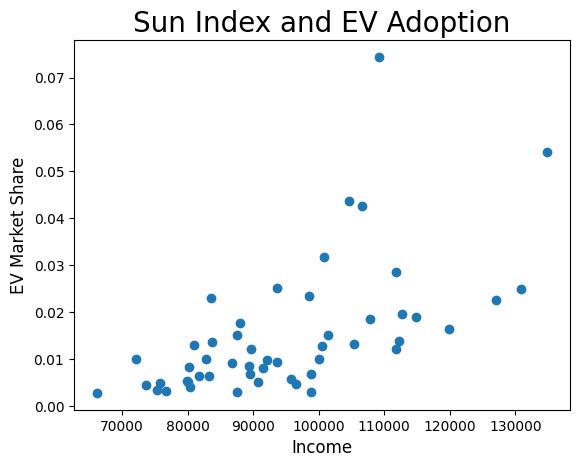

In [45]:
## Part 6: Analysis

# Question 1: Is EV adoption impacted by income?
plt.scatter(filescombined['Average Income'], filescombined['EV_BEV_PHEV_Share'])
plt.xlabel('Income', fontsize = 12)
plt.ylabel('EV Market Share', fontsize = 12)
plt.title('Sun Index and EV Adoption', fontsize = 20)
plt.show()

In [46]:
# plot bar plot to see the relationship between Income and EV Market Share

def income_tier(x):
    if x < 80000:
        return 'a. < 80k'
    elif x < 100000:
        return 'b. < 100k'
    elif x < 120000:
        return 'c. < 120k'
    else:
        return 'd. 120k+'
filescombined['income_rank'] = filescombined['Average Income'].apply(income_tier)

In [47]:
filescombined.groupby('income_rank')['EV_BEV_PHEV_Share'].mean()

income_rank
a. < 80k     0.004900
b. < 100k    0.010158
c. < 120k    0.024773
d. 120k+     0.033833
Name: EV_BEV_PHEV_Share, dtype: float64

In [54]:
# plot the above summary statistics
fig = plt.figure(figsize = (10, 5))
income_ev = filescombined.groupby('income_rank')['EV_BEV_PHEV_Share'].mean().reset_index().rename(columns = {'EV_BEV_PHEV_Share': 'EV Market Share'})
income_ev

,income_rank,EV Market Share
0,a. < 80k,0.004900
1,b. < 100k,0.010158
2,c. < 120k,0.024773
3,d. 120k+,0.033833


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Income and EV Adoption')

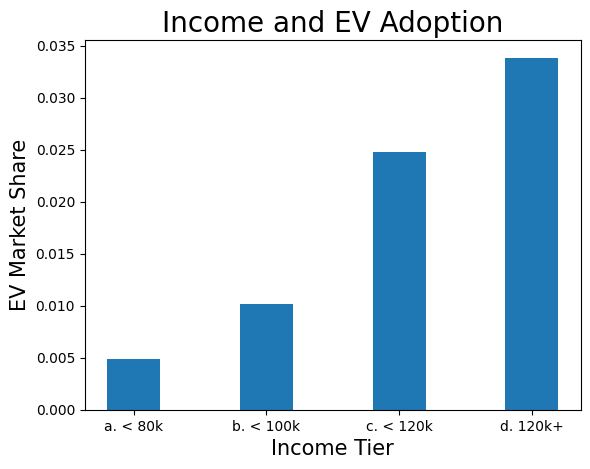

In [55]:
plt.bar(income_ev['income_rank'], income_ev['EV Market Share'], width = 0.4)
plt.xlabel("Income Tier", fontsize = 15)
plt.ylabel("EV Market Share", fontsize = 15)
plt.title("Income and EV Adoption", fontsize = 20)

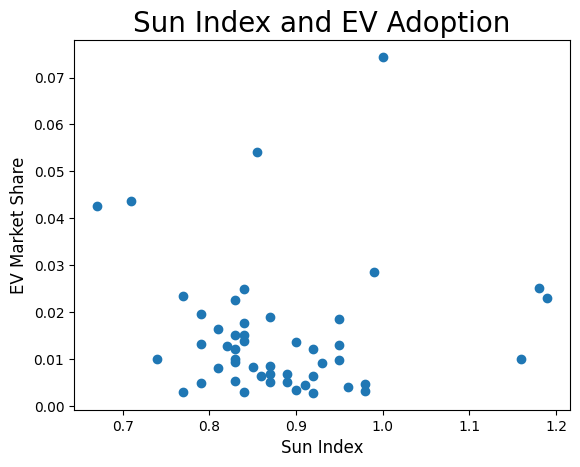

In [56]:
# Question 2: Is EV adoption impacted by solar potential?

plt.scatter(filescombined['Sun Index'], filescombined['EV_BEV_PHEV_Share'])
plt.xlabel('Sun Index', fontsize = 12)
plt.ylabel('EV Market Share', fontsize = 12)
plt.title('Sun Index and EV Adoption', fontsize = 20)
plt.show()

In [57]:
def solar_index(x):
    if x < 0.8:
        return 'a. < 0.8'
    elif x < 0.9:
        return 'b. < 0.9'
    elif x < 1:
        return 'c. < 1.0'
    else:
        return 'd. 1+'
filescombined['Sun Index Tier'] = filescombined['Sun Index'].apply(solar_index)

In [58]:
filescombined.groupby('Sun Index Tier')['EV_BEV_PHEV_Share'].mean()

Sun Index Tier
a. < 0.8    0.020088
b. < 0.9    0.013343
c. < 1.0    0.009550
d. 1+       0.028367
Name: EV_BEV_PHEV_Share, dtype: float64

Text(0.5, 1.0, 'Sun Index and EV Adoption')

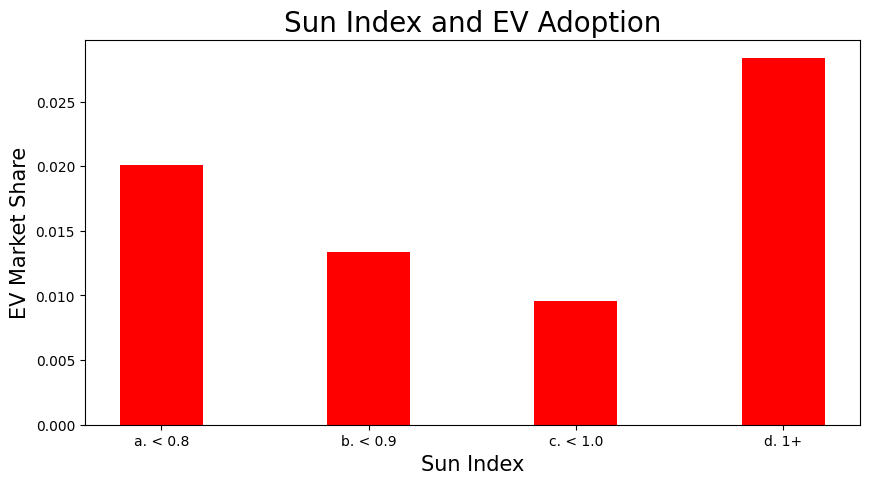

In [60]:
fig = plt.figure(figsize = (10, 5))

solar_ev = filescombined.groupby('Sun Index Tier')['EV_BEV_PHEV_Share'].mean().reset_index().rename(columns = {'EV_BEV_PHEV_Share': 'EV Market Share'})

plt.bar(solar_ev['Sun Index Tier'], solar_ev['EV Market Share'], color = 'red', width = 0.4)
plt.xlabel('Sun Index', fontsize = 15)
plt.ylabel('EV Market Share', fontsize = 15)
plt.title("Sun Index and EV Adoption", fontsize = 20)

In [61]:
# Question 3: What if we plot Income and Sun Index in one chart?

# We are going to use a heatmap to show this. In order to generate a heatmap, we need to make a 2*2 pivot table first
income_sunindex_EV = pd.pivot_table(filescombined, index = 'Sun Index Tier', columns = 'income_rank', values = 'EV_BEV_PHEV_Share')
income_sunindex_EV

income_rank,a. < 80k,b. < 100k,c. < 120k,d. 120k+
Sun Index Tier,,,,
a. < 0.8,0.004900,0.012200,0.029800,NaN
b. < 0.9,0.005400,0.008392,0.014186,0.033833
c. < 1.0,0.003475,0.009100,0.023500,NaN
d. 1+,0.010100,0.018000,0.053050,NaN


<AxesSubplot: xlabel='income_rank', ylabel='Sun Index Tier'>

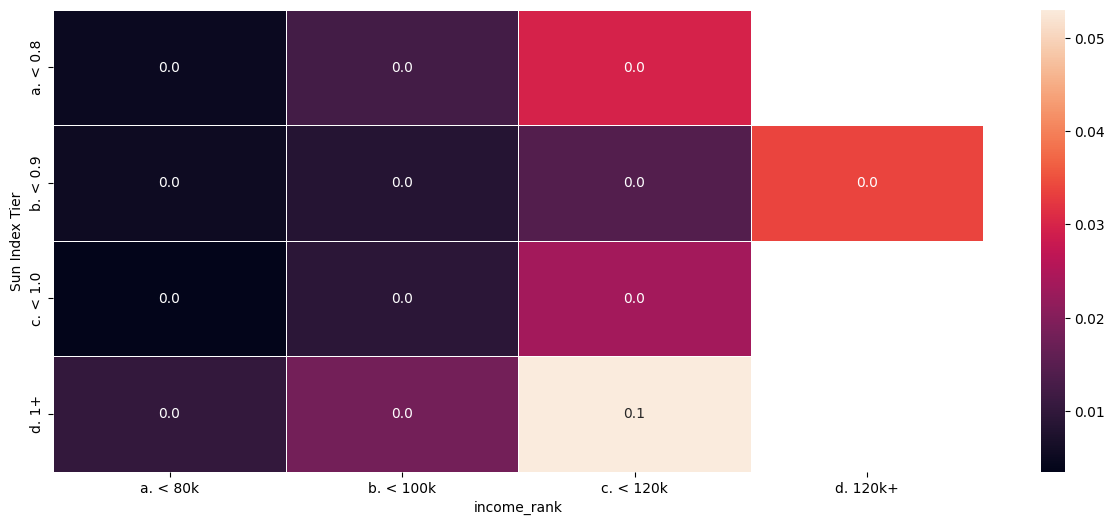

In [62]:
f, ax = plt.subplots(figsize = (15, 6))
sns.heatmap(income_sunindex_EV, annot = True, fmt = ".1f", linewidths = .5, ax = ax)

In [63]:
# Question 4: Are there other factors correlated with EV adoption?

filescombined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   level_0                  51 non-null     float64
 1   Population Rank          51 non-null     float64
 2   State                    51 non-null     object 
 3   Population in 2021       51 non-null     float64
 4   Population in 2020       51 non-null     float64
 5   Total Size Rank          51 non-null     float64
 6   total_size               51 non-null     float64
 7   Land Size Rank           51 non-null     float64
 8   land area                51 non-null     float64
 9   Water Area Rank          51 non-null     float64
 10  water area               51 non-null     float64
 11  Population Density Rank  51 non-null     float64
 12  Population Density       51 non-null     float64
 13  percent_land_area        51 non-null     float64
 14  index                    48 

In [64]:
filescombined.columns.tolist()

['level_0',
 'Population Rank',
 'State',
 'Population in 2021',
 'Population in 2020',
 'Total Size Rank',
 'total_size',
 'Land Size Rank',
 'land area',
 'Water Area Rank',
 'water area',
 'Population Density Rank',
 'Population Density',
 'percent_land_area',
 'index',
 'Solar Potential Rank',
 'Sun Index',
 'State Abbreviation',
 'Average Income',
 '2019_BEV_Sales',
 '2019_BEV_Market_Share',
 '2019_PHEV_Sales',
 '2019_PHEV_Market_Share',
 'EV_BEV_PHEV_Share',
 'EV_BEV_PHEV_Sales',
 'income_rank',
 'Sun Index Tier']

In [65]:
# select some columns for correlation analysis
selected_columns=[
 'Population in 2021',
 'total_size',
 'land area',
 'water area',
 'Population Density',
 'percent_land_area',
 'Sun Index',
 'State Abbreviation',
 'Average Income',
 '2019_PHEV_Market_Share']

In [66]:
df_selected_columns=filescombined[selected_columns]
df_selected_columns.corr()

C:\Users\ellen\AppData\Local\Temp\ipykernel_22316\162267084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_selected_columns.corr()


,Population in 2021,total_size,land area,water area,Population Density,percent_land_area,Sun Index,Average Income,2019_PHEV_Market_Share
Population in 2021,1.000000,0.142196,0.153952,0.044508,-0.081569,-0.021791,0.104077,0.146280,0.371603
total_size,0.142196,1.000000,0.995809,0.832569,-0.164013,0.108175,0.481837,-0.090295,-0.048895
land area,0.153952,0.995809,1.000000,0.778418,-0.174501,0.174636,0.513954,-0.106161,-0.046151
water area,0.044508,0.832569,0.778418,1.000000,-0.068936,-0.315275,-0.170061,0.022742,-0.056266
Population Density,-0.081569,-0.164013,-0.174501,-0.068936,1.000000,-0.130597,-0.084750,0.447854,0.455053
percent_land_area,-0.021791,0.108175,0.174636,-0.315275,-0.130597,1.000000,0.344949,-0.313956,-0.145353
Sun Index,0.104077,0.481837,0.513954,-0.170061,-0.084750,0.344949,1.000000,-0.292612,-0.065536
Average Income,0.146280,-0.090295,-0.106161,0.022742,0.447854,-0.313956,-0.292612,1.000000,0.562919
2019_PHEV_Market_Share,0.371603,-0.048895,-0.046151,-0.056266,0.455053,-0.145353,-0.065536,0.562919,1.000000


C:\Users\ellen\AppData\Local\Temp\ipykernel_22316\2479261419.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_selected_columns.corr())


<AxesSubplot: >

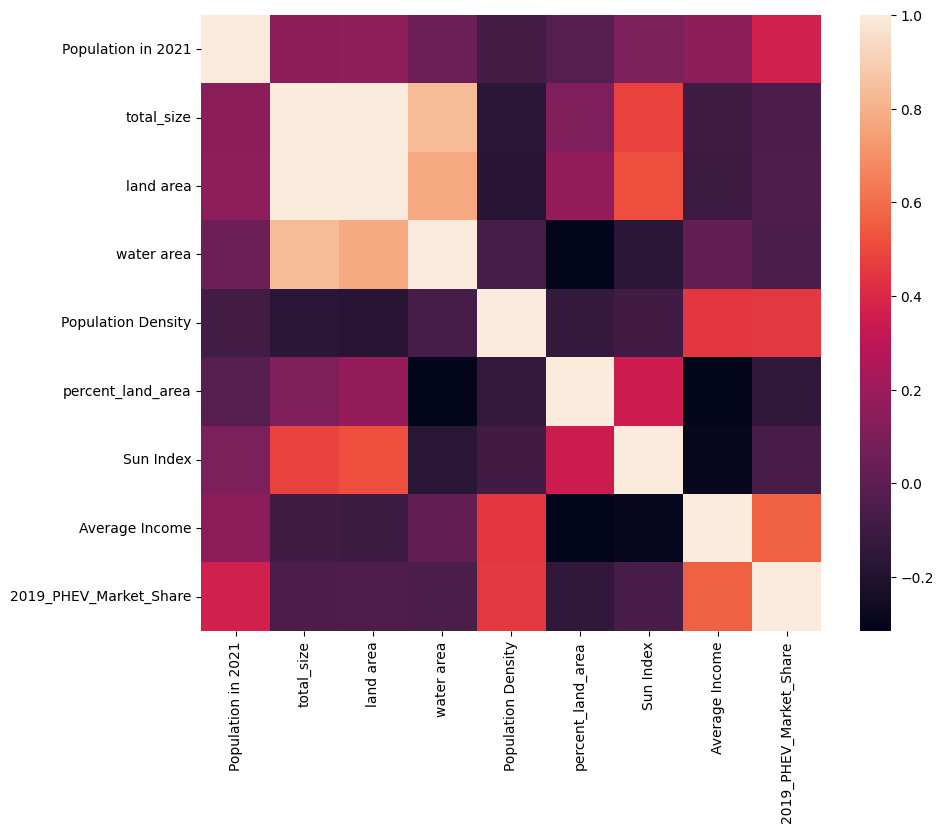

In [67]:
# Plot the correlations
fig=plt.figure(figsize=(10, 8))
sns.heatmap(df_selected_columns.corr())

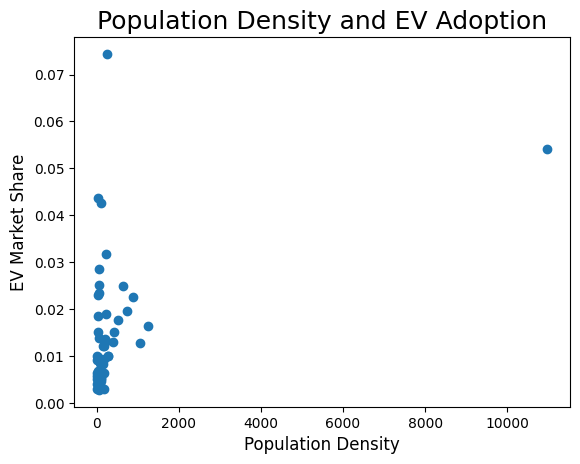

In [68]:
# Population density seems to be correlated with EV adoption
plt.scatter(filescombined['Population Density'], filescombined['EV_BEV_PHEV_Share'])
plt.xlabel('Population Density', fontsize = 12)
plt.ylabel('EV Market Share', fontsize = 12)
plt.title('Population Density and EV Adoption', fontsize = 18)
plt.show()

In [72]:
# find out what the outlier is

# Wahsington DC is a city. It does not have suburb or rural area, its population density greatly exceeds all US states.
filescombined[filescombined['Population Density'] > 10000][['State', 'State Abbreviation']]

,State,State Abbreviation
8,District of Columbia,DC


In [76]:
# plot a regression line to reveal the relationship between Population Density and EV Adoption
'''
    altair is a declarative statistical visualization library for Python.
    The key idea is that you are declaring links between data columns and visual encoding channels, such as the x-axis, y-axis, color, etc. The rest of the plot details are handled automatically.
'''
import altair as alt

sc_plot = alt.Chart(filescombined).mark_point().encode(
    x = "Population Density",
    y = "EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Population Density", "EV_BEV_PHEV_Share").mark_line()

alt.LayerChart(...)

In [77]:
filescombined_no_outlier = filescombined[filescombined['Population Density'] < 4000]

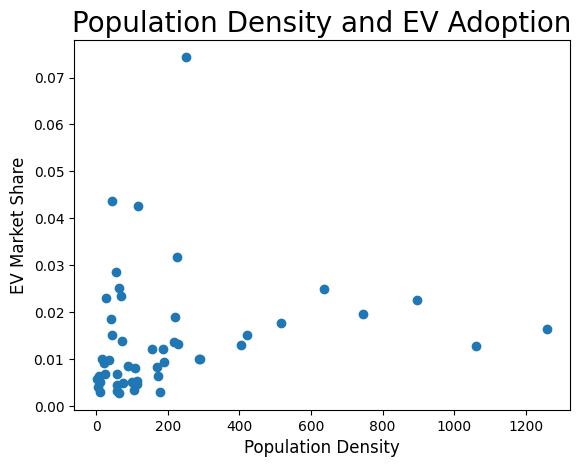

In [79]:
plt.scatter(filescombined_no_outlier['Population Density'], filescombined_no_outlier['EV_BEV_PHEV_Share'])
plt.xlabel('Population Density', fontsize = 12)
plt.ylabel('EV Market Share', fontsize = 12)
plt.title('Population Density and EV Adoption', fontsize = 20)
plt.show()

In [80]:
sc_plot = alt.Chart(filescombined_no_outlier).mark_point().encode(
    x = "Population Density",
    y = "EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Population Density", "EV_BEV_PHEV_Share").mark_line()

C:\Users\ellen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [81]:
# Let plot solar potential (Sun Index) and EV adoption
sc_plot = alt.Chart(filescombined_no_outlier).mark_point().encode(
    x = "Sun Index",
    y = "EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Sun Index", "EV_BEV_PHEV_Share").mark_line()

C:\Users\ellen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [82]:
def pop_density(x):
    if x < 50:
        return 'a. < 50'
    elif x < 100:
        return 'b. < 100'
    elif x < 200:
        return 'c. < 200'
    else:
        return 'd. 200+'
filescombined['population density tier'] = filescombined['Population Density'].apply(pop_density)

In [83]:
filescombined.groupby('population density tier')['EV_BEV_PHEV_Share'].mean()

population density tier
a. < 50     0.012362
b. < 100    0.011536
c. < 200    0.010518
d. 200+     0.023013
Name: EV_BEV_PHEV_Share, dtype: float64

Text(0.5, 1.0, 'Population Density and EV Adoption')

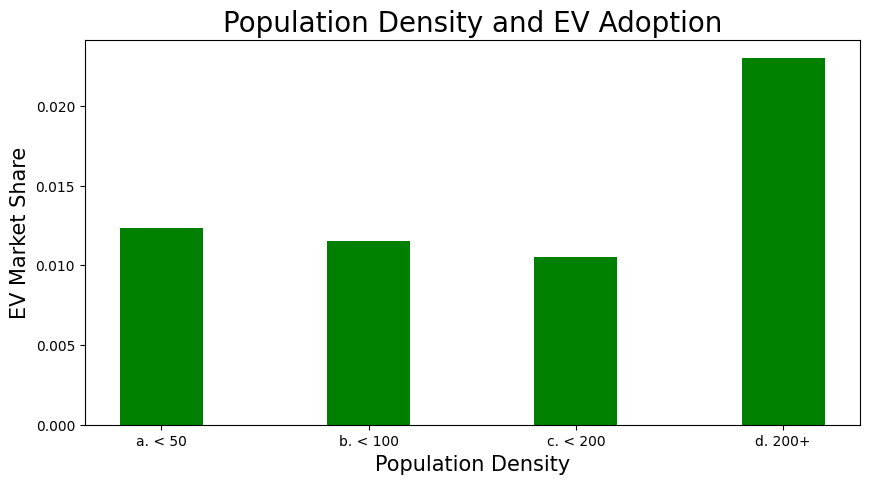

In [84]:
fig = plt.figure(figsize = (10, 5))

pop_den_tier = filescombined.groupby('population density tier')['EV_BEV_PHEV_Share'].mean().reset_index().rename(columns = {'EV_BEV_PHEV_Share': 'EV Market Share'})

plt.bar(pop_den_tier['population density tier'], pop_den_tier['EV Market Share'], color = 'green', width = 0.4)
plt.xlabel("Population Density", fontsize = 15)
plt.ylabel("EV Market Share", fontsize = 15)
plt.title("Population Density and EV Adoption", fontsize = 20)

In [85]:
sc_plot = alt.Chart(filescombined_no_outlier).mark_point().encode(
    x = "Average Income",
    y = "EV_BEV_PHEV_Share"
)

sc_plot + sc_plot.transform_regression("Average Income", "EV_BEV_PHEV_Share").mark_line()

C:\Users\ellen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.LayerChart(...)

In [94]:
# Part 7: Data for Charging Stations
charging_station = pd.read_csv(path + 'alt_fuel_stations (Sep 7 2022).csv')

C:\Users\ellen\AppData\Local\Temp\ipykernel_22316\2044941441.py:2: DtypeWarning: Columns (6,20,31,46) have mixed types. Specify dtype option on import or set low_memory=False.
  charging_station = pd.read_csv(path + 'alt_fuel_stations (Sep 7 2022).csv')


In [95]:
charging_station.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,LADWP - Haynes Power Plant,6801 E 2nd St,NaN,Long Beach,CA,90803,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
charging_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54352 entries, 0 to 54351
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    54352 non-null  object 
 1   Station Name                      54352 non-null  object 
 2   Street Address                    54319 non-null  object 
 3   Intersection Directions           2626 non-null   object 
 4   City                              54352 non-null  object 
 5   State                             54352 non-null  object 
 6   ZIP                               54352 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     51048 non-null  object 
 9   Status Code                       54352 non-null  object 
 10  Expected Date                     0 non-null      float64
 11  Groups With Access Code           54352 non-null  object 
 12  Acce

In [97]:
charging_station.groupby('State')['Station Name'].count()

State
AK       56
AL      319
AR      205
AZ      958
CA    15474
CO     1789
CT      564
DC      310
DE      133
FL     2924
GA     1639
HI      390
IA      305
ID      151
IL     1144
IN      391
KS      500
KY      254
LA      179
MA     2412
MD     1399
ME      406
MI     1132
MN      594
MO     1043
MS      113
MT       98
MX        1
NC     1211
ND       79
NE      215
NH      191
NJ      867
NM      208
NV      517
NY     3403
OH     1149
OK      336
ON        5
OR     1024
PA     1323
PR        6
QC        2
RI      301
SC      432
SD       68
TN      705
TX     2529
UT      803
VA     1265
VT      343
WA     1837
WI      455
WV      120
WY       75
Name: Station Name, dtype: int64

In [98]:
charging_station = charging_station.rename(columns = {'State': 'State Abbreviation'})

In [99]:
charging_station_summary = charging_station.groupby('State Abbreviation')['Station Name'].count().reset_index().rename(columns = {'Station Name': 'Charging Station Count'})
charging_station_summary.head()

,State Abbreviation,Charging Station Count
0,AK,56
1,AL,319
2,AR,205
3,AZ,958
4,CA,15474


In [100]:
# merge with previously combined file
filescombined2 = pd.merge(filescombined, charging_station_summary, on = 'State Abbreviation', how = 'left')

In [101]:
# calculate EV/Charging_station ratio
filescombined2['EV_staion_availability'] = filescombined2['Charging Station Count'] / filescombined2['EV_BEV_PHEV_Sales']

In [102]:
filescombined2['EV_station_availability'].describe()

KeyError: 'EV_station_availability'